In [90]:
import pandas as pd
import numpy as np
df = pd.read_csv('Traffic.csv', header = None)
df = pd.DataFrame(df)
# df = df.set_index(df[0])
# df = pd.Series(df.drop(0, axis=1))
df.columns = ['날짜', '교통유입량']
df

,날짜,교통유입량
0,16. 7. 1.,766
1,16. 7. 2.,377
2,16. 7. 3.,427
3,16. 7. 4.,902
4,16. 7. 5.,850
...,...,...
361,17. 6. 27.,"1,436"
362,17. 6. 28.,"1,387"
363,17. 6. 29.,"1,328"
364,17. 6. 30.,"1,193"


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      365 non-null    object
 1   교통유입량   365 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [92]:
df = df.dropna(axis=0)
df.isnull().value_counts()

날짜     교통유입량
False  False    365
dtype: int64

In [82]:
df['날짜'] = pd.datetime(df['날짜'])

<ipython-input-82-a145552c6548>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['날짜'] = pd.datetime(df['날짜'])


TypeError: cannot convert the series to <class 'int'>

In [93]:
df['날짜'] = range(1,366)

<ipython-input-93-bc5735398884>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['날짜'] = range(1,366)


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      365 non-null    int32 
 1   교통유입량   365 non-null    object
dtypes: int32(1), object(1)
memory usage: 7.1+ KB


In [126]:
import re
df['교통유입량'] = df['교통유입량'].replace(r',','', regex =True)

<ipython-input-126-c09eb179d9ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['교통유입량'] = df['교통유입량'].replace(r',','', regex =True)


In [121]:
df['교통유입량'].sort_values(ascending=True)

238    1,002
217    1,003
196    1,011
185    1,013
208    1,025
       ...  
231      987
18       989
128      993
67       993
224      994
Name: 교통유입량, Length: 365, dtype: object

In [127]:
df['교통유입량'] = df['교통유입량'].astype('int')

<ipython-input-127-b4cc7a3a7493>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['교통유입량'] = df['교통유입량'].astype('int')


In [140]:
df['교통유입량']

0       766
1       377
2       427
3       902
4       850
       ... 
360    1309
361    1436
362    1387
363    1328
364    1193
Name: 교통유입량, Length: 365, dtype: int32

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['날짜'], df['교통유입량'], test_size=0.3, random_state = 10)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
r_square = lr.score(x_test, y_test)

print('기울기 a', lr.coef_)
print('절편 b', lr.intercept_)
y_hat = lr.predict(x)

plt.plot(x_test, y_hat, 'r+', label = 'Predicted Value')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[194 265  37  11  62  82 125 365 356 344 270 246 262 364 346  36 271 301
  20 109   6 278 264 105 168  61  22 277 107 140 128  50 209  59  76 267
 355 193 149  39 280 198 185 164 133 250 279  69 184   1  51 347 175 303
  56 304 219 243  84 156 176 252  64 130 312 362 339 199  87 211 161  47
 306 163 333 177  85 311 200 340 263   3 138 223 324 117 121 338 197 181
 206 282  33 299   8  10 104  92  40  29 327 310 353 170 342 191 227 268
 207 154 218 361  31 110 325  73 214 137 309 296 248 102 169 357 230 225
 323 172 258 162 150 298 315 215 116 242 316 289 359 118  49 108 313 328
 302 294  83  96  68  97  23 255 245 286 160 331 145 210  91  42 234 300
  54 179 274 341 292  52  15 297 273   4  24 129 166 202  46 236 238  43
 233  80 186 349 221 269 113  12 151 235  86 247 135 144 272 291 183 307
 319   5 134  45 251 290 285 204 136 146  72 119 330 363 217  75 360 249
  95 343  94  19 284 293 314  32 322 141  90 159 287 142 244  14  78 352
 180 178 201  34  63 123 345  55 240  17  41 257  74   9 222 157 124 321
  16 126 266].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  fon

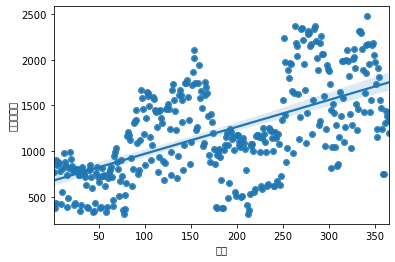

In [143]:
import matplotlib.pyplot as  plt
import seaborn as sns
import seaborn as sns
sns.regplot(x = df['날짜'], y = df['교통유입량'])
# plt.plot(df['교통유입량'])
plt.scatter(x = df['날짜'], y = df['교통유입량'], s = 10)
plt.show()

<AxesSubplot:xlabel='날짜', ylabel='교통유입량'>

C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  fon

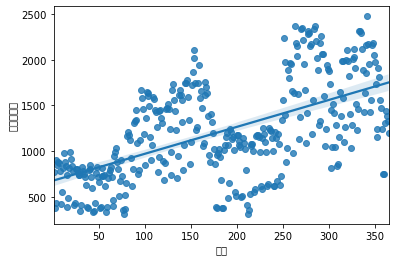

In [137]:
import seaborn as sns
sns.regplot(x = df['날짜'], y = df['교통유입량'])